# **Import a necessary labraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
    roc_auc_score
)


# **Loading dataset**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Projects/Fraud Transaction Deduction/fraudTest.csv')
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21-06-2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21-06-2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21-06-2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21-06-2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21-06-2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


# **Basic data descriptions**

checking data informations

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

**check the null values on the dataset**

In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


**Describe the dataset to get the insights**

In [ ]:
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800430e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521420e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635330e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992350e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


**checking uniqueness of the data**

In [ ]:
data['category'].value_counts() # checking how many cotegorys and there counts

,count
category,
gas_transport,56370
grocery_pos,52553
home,52345
shopping_pos,49791
kids_pets,48692
shopping_net,41779
entertainment,40104
personal_care,39327
food_dining,39268


In [ ]:
data['gender'].value_counts() # counting gender

,count
gender,
F,304886
M,250833


In [ ]:
data['is_fraud'].value_counts() # counting fraudlent

,count
is_fraud,
0,553574
1,2145


In [ ]:
# I want to filter rows where is_fraud equals 1 and then get value counts for category and gender
fraud_data = data[data['is_fraud'] == 1]
value_counts = fraud_data[['category', 'gender']].value_counts()
value_counts

category        gender
shopping_net    M         272
grocery_pos     M         244
                F         241
shopping_net    F         234
misc_net        M         152
                F         115
shopping_pos    M         107
                F         106
gas_transport   M          89
                F          65
home            F          59
kids_pets       F          55
personal_care   F          54
misc_pos        F          54
food_dining     F          46
health_fitness  F          45
entertainment   F          40
travel          F          31
grocery_net     M          22
                F          19
entertainment   M          19
misc_pos        M          18
personal_care   M          16
kids_pets       M          10
travel          M           9
food_dining     M           8
home            M           8
health_fitness  M           7
Name: count, dtype: int64

**Droping the unwanted colunms in the dataset**

In [ ]:
data=data.drop([ 'Unnamed: 0', 'trans_date_trans_time', 'merchant', 'cc_num', 'first', 'last',
           'street', 'city', 'zip', 'dob', 'trans_num'],axis=1)
data.head()

,category,amt,gender,state,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,personal_care,2.86,M,SC,33.9659,-80.9355,333497,Mechanical engineer,1371816865,33.986391,-81.200714,0
1,personal_care,29.84,F,UT,40.3207,-110.4360,302,"Sales professional, IT",1371816873,39.450498,-109.960431,0
2,health_fitness,41.28,F,NY,40.6729,-73.5365,34496,"Librarian, public",1371816893,40.495810,-74.196111,0
3,misc_pos,60.05,M,FL,28.5697,-80.8191,54767,Set designer,1371816915,28.812398,-80.883061,0
4,travel,3.19,M,MI,44.2529,-85.0170,1126,Furniture designer,1371816917,44.959148,-85.884734,0


# **Perform Exploratory Data Analysis (EDA) on this dataset**

**Univariate Analysis**

<Axes: xlabel='is_fraud', ylabel='count'>

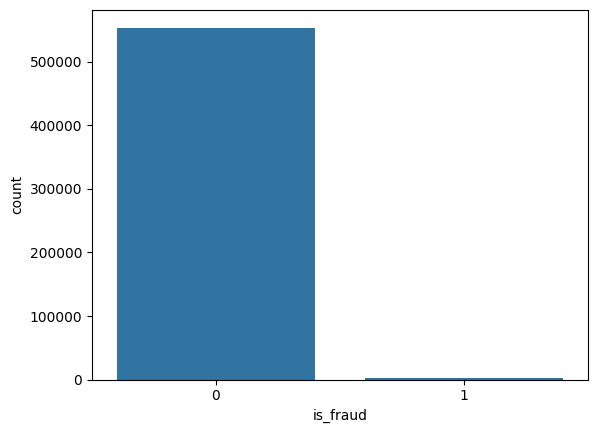

In [ ]:
# Plot countplot to view fraud count
sns.countplot(x='is_fraud', data=data)

**Bivariate Analysis**

<Axes: xlabel='is_fraud', ylabel='amt'>

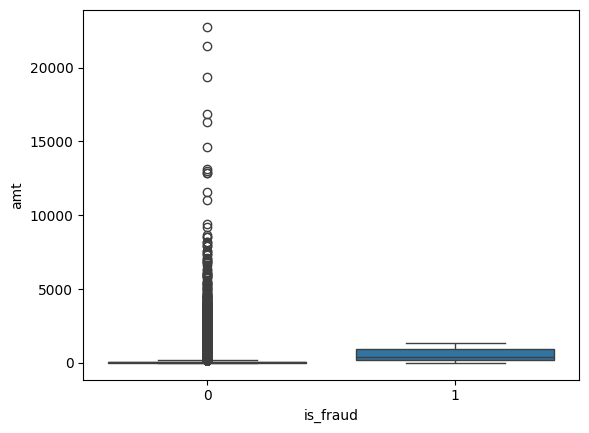

In [ ]:
# Plot boxplot
sns.boxplot(x='is_fraud', y='amt', data=data)

**Multivariate Analysis**

Text(0.5, 1.0, 'Correlation Matrix')

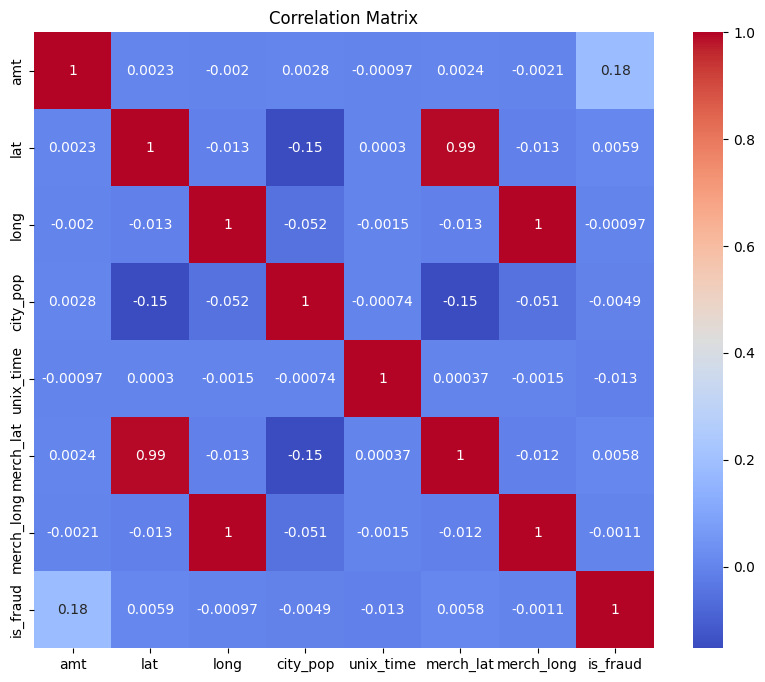

In [ ]:
# Selecting only numerical columns using select_dtypes
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Assain the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")

# **Data Preprocessing**

**Outlier Removal**

In [ ]:
Q1 = data['amt'].quantile(0.25)
Q3 = data['amt'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['amt'] < (Q1 - 1.5 * IQR)) | (data['amt'] > (Q3 + 1.5 * IQR)))]
data.head()

,category,amt,gender,state,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,personal_care,2.86,M,SC,33.9659,-80.9355,333497,Mechanical engineer,1371816865,33.986391,-81.200714,0
1,personal_care,29.84,F,UT,40.3207,-110.4360,302,"Sales professional, IT",1371816873,39.450498,-109.960431,0
2,health_fitness,41.28,F,NY,40.6729,-73.5365,34496,"Librarian, public",1371816893,40.495810,-74.196111,0
3,misc_pos,60.05,M,FL,28.5697,-80.8191,54767,Set designer,1371816915,28.812398,-80.883061,0
4,travel,3.19,M,MI,44.2529,-85.0170,1126,Furniture designer,1371816917,44.959148,-85.884734,0


**Feature Scaling**

In [ ]:
scaler = StandardScaler()
numerical_features = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']
data[numerical_features] = scaler.fit_transform(data[numerical_features])
data.head()

,category,amt,gender,state,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,personal_care,-1.086260,M,SC,-0.909266,0.676779,0.832562,Mechanical engineer,1371816865,-0.898977,0.656907,0
1,personal_care,-0.470811,F,UT,0.347946,-1.474744,-0.290571,"Sales professional, IT",1371816873,0.174708,-1.438891,0
2,health_fitness,-0.209850,F,NY,0.417624,1.216401,-0.175310,"Librarian, public",1371816893,0.380109,1.167351,0
3,misc_pos,0.218319,M,FL,-1.976831,0.685269,-0.106980,Set designer,1371816915,-1.915655,0.680055,0
4,travel,-1.078732,M,MI,1.125879,0.379108,-0.287793,Furniture designer,1371816917,1.257146,0.315570,0


**Feature Engineering (Categorical Encoding)**

In [ ]:
data = pd.get_dummies(data, columns=['category', 'gender', 'state', 'job'], drop_first=True)
data.head()

,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,category_food_dining,category_gas_transport,...,job_Video editor,job_Visual merchandiser,job_Volunteer coordinator,job_Warden/ranger,job_Waste management officer,job_Water engineer,job_Water quality scientist,job_Web designer,job_Wellsite geologist,job_Writer
0,-1.086260,-0.909266,0.676779,0.832562,1371816865,-0.898977,0.656907,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,-0.470811,0.347946,-1.474744,-0.290571,1371816873,0.174708,-1.438891,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-0.209850,0.417624,1.216401,-0.175310,1371816893,0.380109,1.167351,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.218319,-1.976831,0.685269,-0.106980,1371816915,-1.915655,0.680055,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,-1.078732,1.125879,0.379108,-0.287793,1371816917,1.257146,0.315570,0,False,False,...,False,False,False,False,False,False,False,False,False,False


# **Model Building**

**Data split**

In [ ]:
X = data.drop(['is_fraud'], axis=1)
y = data['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### **Random Forest**

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print(f"Training Accuracy: {rf_model.score(X_train, y_train):.2f}")
print(f"Test Accuracy: {rf_model.score(X_test, y_test):.2f}")

Training Accuracy: 1.00
Test Accuracy: 1.00


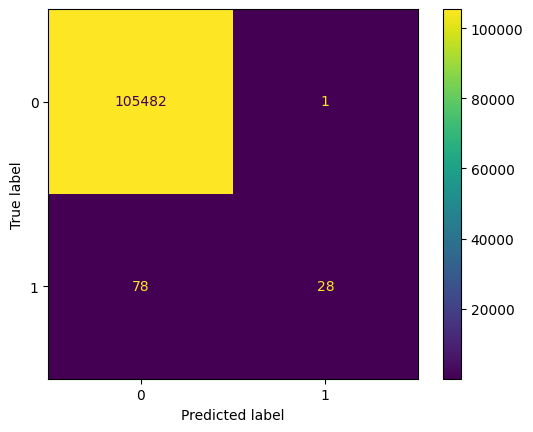

In [ ]:
# confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
plt.show()


In [ ]:
# Classification Report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    105483
           1       0.97      0.26      0.41       106

    accuracy                           1.00    105589
   macro avg       0.98      0.63      0.71    105589
weighted avg       1.00      1.00      1.00    105589



In [ ]:
#Metrics (Accuracy, Precision, Recall, F1-Score)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))

Accuracy: 0.9992518160035609
Precision: 0.9655172413793104
Recall: 0.2641509433962264
F1 Score: 0.4148148148148148


In [ ]:
# Cross-Validation
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.25051852 0.99912869 0.99919498 0.99921393 0.99898663]
Mean CV Score: 0.8494085492318826


### **Logistic Regression**

In [ ]:
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print(f"Training Accuracy: {lr_model.score(X_train, y_train):.2f}")
print(f"Test Accuracy: {lr_model.score(X_test, y_test):.2f}")

Training Accuracy: 1.00
Test Accuracy: 1.00


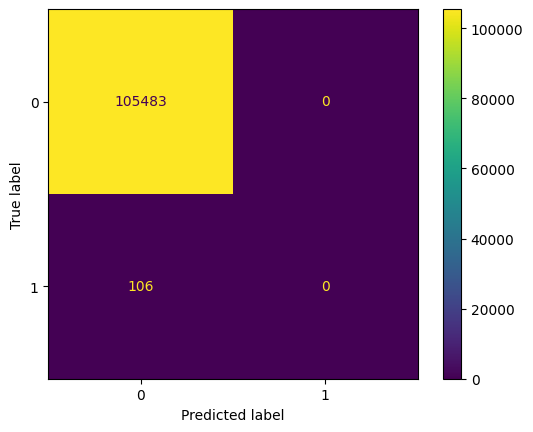

In [ ]:
# confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr)
plt.show()

In [ ]:
#Metrics (Accuracy, Precision, Recall, F1-Score)
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))

Accuracy: 0.9989961075490819
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Cross-Validation
cv_scores = cross_val_score(lr_model, X, y, cv=2)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.99899231 0.99899231]
Mean CV Score: 0.9989923116408805


### **Decision Tree**

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print(f"Training Accuracy: {dt_model.score(X_train, y_train):.2f}")
print(f"Test Accuracy: {dt_model.score(X_test, y_test):.2f}")

Training Accuracy: 1.00
Test Accuracy: 1.00


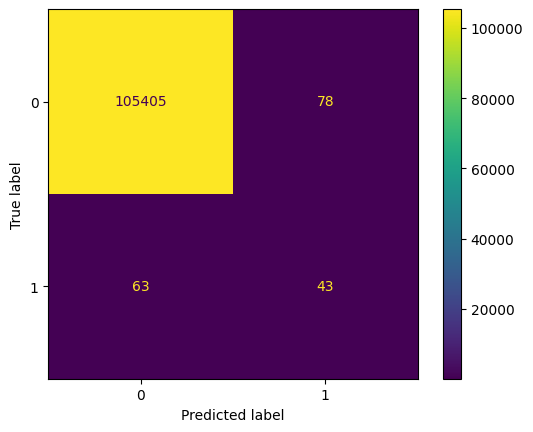

In [ ]:
# confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt)
plt.show()

In [ ]:
#Metrics (Accuracy, Precision, Recall, F1-Score)
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))

Accuracy: 0.9986646336266088
Precision: 0.35537190082644626
Recall: 0.4056603773584906
F1 Score: 0.3788546255506608


In [ ]:
# Cross-Validation
cv_scores = cross_val_score(dt_model, X, y, cv=2)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.00510283 0.99866652]
Mean CV Score: 0.5018846742000355


# **To analyze bias and variance in your fraud detection system**

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# Function to calculate train and test performance
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train performance
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)

    # Test performance
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    # Print results
    print(f"Training Accuracy: {train_accuracy:.2f}, F1-Score: {train_f1:.2f}")
    print(f"Testing Accuracy: {test_accuracy:.2f}, F1-Score: {test_f1:.2f}")
    print(f"Bias (Training Error): {1 - train_accuracy:.2f}")
    print(f"Variance (Difference): {train_accuracy - test_accuracy:.2f}")
    print("-" * 40)
    return train_accuracy, test_accuracy

print("Random Forest Model")
evaluate_model(rf_model, X_train, y_train, X_test, y_test)

print("Logistic Regression Model")
evaluate_model(lr_model, X_train, y_train, X_test, y_test)

print("Decision Tree Model")
evaluate_model(dt_model, X_train, y_train, X_test, y_test)

Random Forest Model
Training Accuracy: 1.00, F1-Score: 1.00
Testing Accuracy: 1.00, F1-Score: 0.41
Bias (Training Error): 0.00
Variance (Difference): 0.00
----------------------------------------
Logistic Regression Model
Training Accuracy: 1.00, F1-Score: 0.00
Testing Accuracy: 1.00, F1-Score: 0.00
Bias (Training Error): 0.00
Variance (Difference): -0.00
----------------------------------------
Decision Tree Model
Training Accuracy: 1.00, F1-Score: 1.00
Testing Accuracy: 1.00, F1-Score: 0.38
Bias (Training Error): 0.00
Variance (Difference): 0.00
----------------------------------------


(1.0, 0.9986646336266088)